In [1]:
import os 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import custom functions
os.chdir('..')
from RuckFinal import DataLoading, Preprocessing, VelocityFeats
os.chdir(os.getcwd()+r'\Tutorials')

Load data

In [2]:
# Initialize path to data (UTM-converted datasets)
data_dir = os.getcwd() + '\\Data\\csv\\UTM_data'

# Load datasets (just a couple)
raw_datasets = DataLoading.load_data(data_dir)[:2]

# Re-shape datasets
datasets = DataLoading.pivot_datsets(raw_datasets)

Get the interpolated data

In [3]:
# get interpolated datasets
interp_datasets = Preprocessing.interpolate_datasets(datasets, threshold = 0.99)

Get movement periods


In [4]:
# get slices for movement periods and break times   
rucks_bySquad, rests_bySquad, all_stops = Preprocessing.get_slices_byArea(interp_datasets, plot=False)

Get an example squad's data

In [5]:
rucks = rucks_bySquad[1]

Smooth the movement periods and get the velocity

In [43]:
# smooth datasets with the spline smoothing method
spline_smoothed_rucks = Preprocessing.spline_smoothing(rucks, s=3e1, UTM=True)

# get a an extra smooth version with a moving average
MA_smoothed_rucks = Preprocessing.smooth_datasets(spline_smoothed_rucks, window=5)

# get the velocity
names = MA_smoothed_rucks[0].UTM_x.columns
vel_dfs = VelocityFeats.get_velocities(MA_smoothed_rucks, names)

100%|██████████| 6/6 [00:00<00:00, 27.46it/s]


Text(0.5, 0.98, 'Speed of soldiers over 5 minutes')

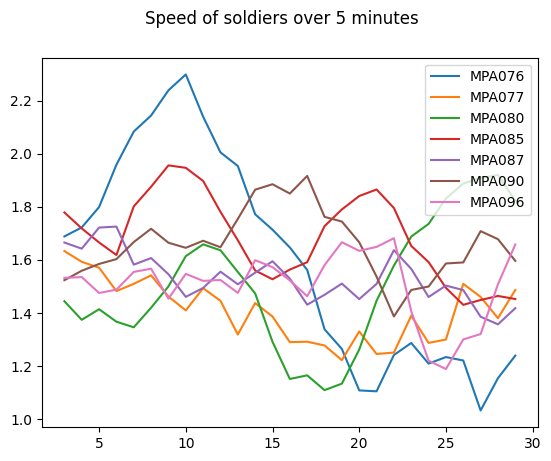

In [44]:
vel_dfs[0][:30].plot()
plt.suptitle('Speed of soldiers over 5 minutes')

In [45]:
vel_vars, vel_diffs = VelocityFeats.get_vel_feats(vel_dfs)

<Axes: >

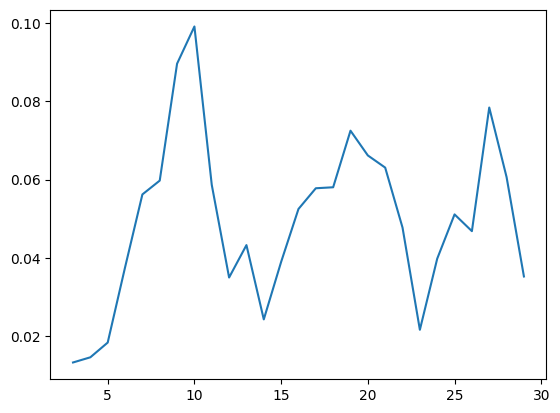

In [46]:
vel_vars[0][:30].plot()

<Axes: >

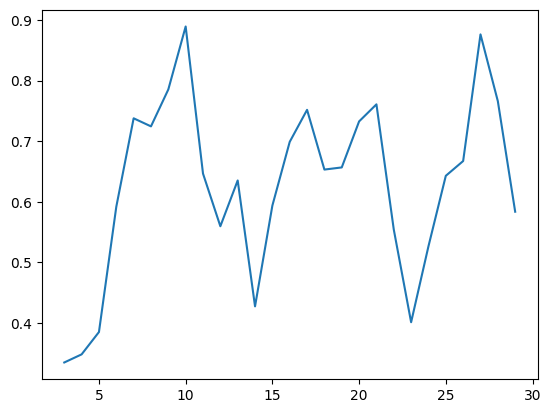

In [47]:
vel_diffs[0][:30].plot()
